## Harmonicity metrics

This notebook is intended to demonstrate the use of the biotuner (https://github.com/antoineBellemare/biotuner/)

The biotuner toolbox allows to extract harmonic information from biological time series, which in turn could both

1. Inform the computation of musical structures
2. Constitute the basis for the distinguishing states of consciousness (when applied to M/EEG signal).

In this notebook we will go through different metrics of harmonicity that can be derived from time series.

As a first step, we will identify spectral peaks of interest in the signal (see the *peaks extraction* notebook for more details).

Then, each metric can be computed on any pair of frequencies. When used on a set of more than two frequencies, some metrics (harmonic similarity, inter-harmonic concordance) will average the values for all possible pairs of frequencies, while others (euler, sub-harmonic tension) will incorporate all the frequencies in their computation by more complex ways than averaging the harmonicity of all pairs of frequencies.

### Harmonic similarity

The harmonic similarity, a measure developed by [Gill and Purves (2008)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0008144), corresponds to ''the percentage of harmonic frequencies that the dyad held in common with a harmonic series defined by the greatest common divisor of the harmonic frequencies in the dyad''.

The formula to derive the harmonic similarity, which is called by the function *dyad_similarity*, is

*HS* = ((x + y - 1) / (x * y)) * 100

We will visualize this metric by defining a ratio of two frequencies, computing the harmonic series of each frequency, and comparing them with the harmonic series of the fundamental frequency, defined as the greatest common divisor.

Reduced fraction : 3/2
Reduced fraction : 33/20
Harmonic similarity : 66.67
Fundamental frequency : 100
Harmonic similarity : 7.88
Fundamental frequency : 10


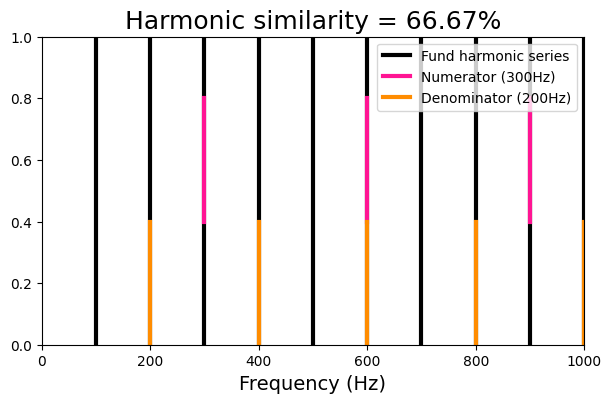

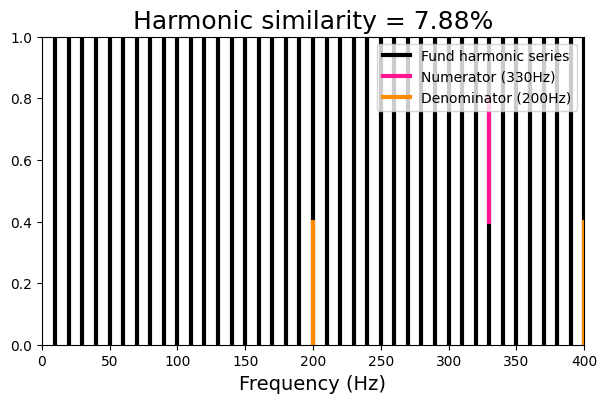

In [1]:
from biotuner.vizs import viz_harmsim
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# define two harmonic frequencies
harm_ratio = [300, 200]
print('Reduced fraction : {}'.format(Fraction(harm_ratio[0]/harm_ratio[1])))

# define two non-harmonic frequencies
nonharm_ratio = [330, 200]
print('Reduced fraction : {}'.format(Fraction(nonharm_ratio[0]/nonharm_ratio[1]).limit_denominator(1000)))

# plot the harmonic similarity of the two pairs of frequencies
viz_harmsim(harm_ratio[0], harm_ratio[1], n_fund=10)
viz_harmsim(nonharm_ratio[0], nonharm_ratio[1], n_fund = 40)

### Inter-harmonic concordance

This metric takes a pair of frequency peaks and compares their harmonics pairwise to find concordances.

We will use a function that plot a visual representation of the inter-harmonic concordance for a pair of high-consonant and a pair of low-consonant frequencies.

[36, 6, 12, 18, 24, 30]


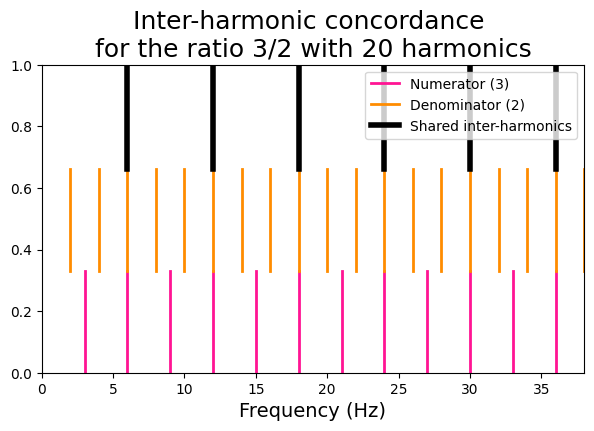

[56, 28]


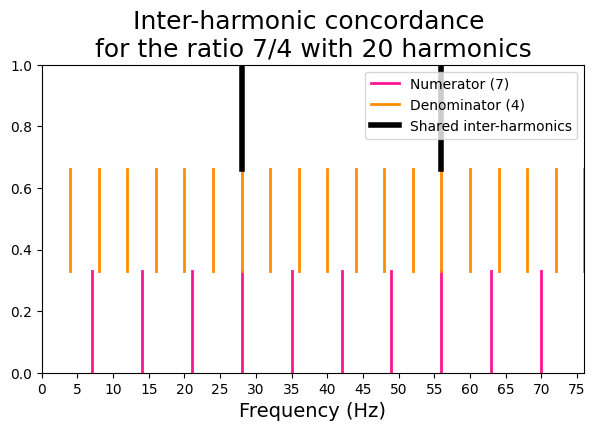

In [2]:
from biotuner.vizs import viz_interharm_conc
# Define number of harmonics
n_harms = 20

# High-consonant frequencies
x = 3
y = 2
viz_interharm_conc(x, y, n_harms)

# Low-consonant frequencies
x2 = 7
y2 = 4
viz_interharm_conc(x2, y2, n_harms)

### Euler Gradus Suavitatis

The Euler metric of harmonicity refers to the ''sweetness'' of a musical chord.
The first step is to find the least common multiple (LCM) of the reduced form of the set of frequencies.
Then, the prime factors of the LCM is added, and finally the number of prime factors is subtracted to give the final result.

Here, we use a function to plot the LCM of the set of frequencies and compare a case of low- and high-harmonicity.

Euler Gradus Suavitatis = 9
Prime factors are [2, 2, 3, 5]


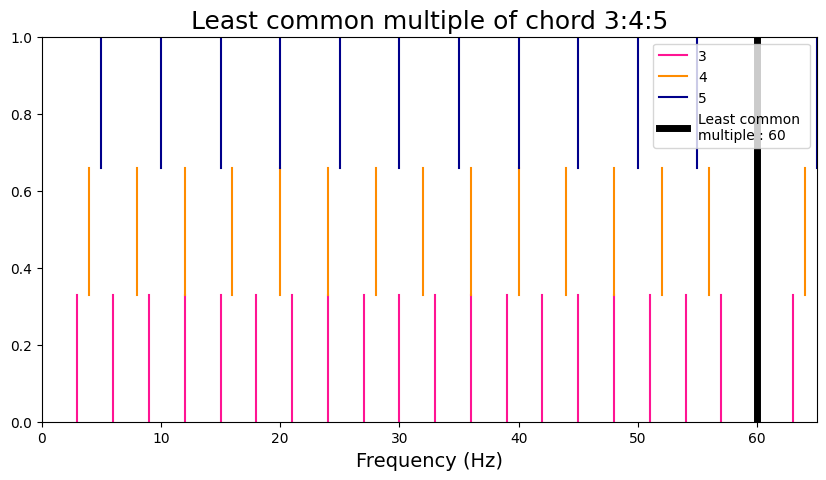

Euler Gradus Suavitatis = 17
Prime factors are [3, 5, 11]


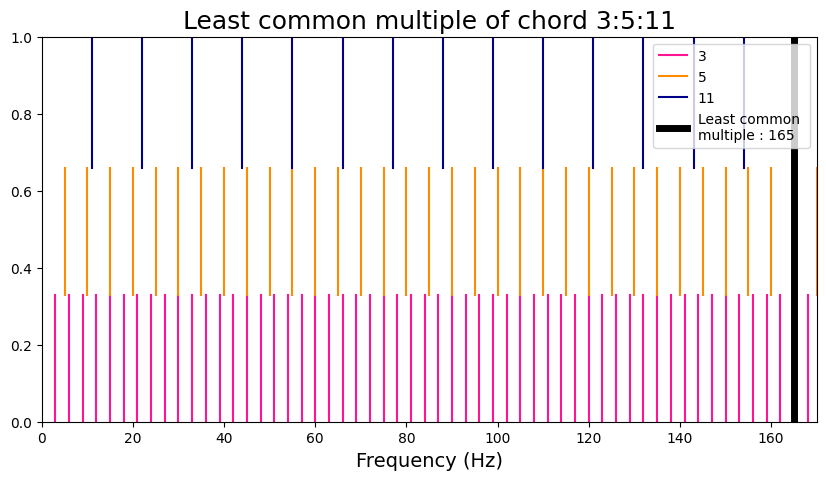

In [3]:
from biotuner.vizs import viz_euler

# high-harmonicity chord
chord_harm = [3, 4, 5]
viz_euler(chord_harm)

# low-harmonicity chord
chord_lowharm = [3, 5, 11]
viz_euler(chord_lowharm)



### Sub-harmonic tension

The subharmonic tension is derived from the [article on transitional harmony](https://downloads.spj.sciencemag.org/research/2019/2369041.pdf) from Chan, Dong and Li (2019). The subharmonic tension refers to the level of alignment between the sets of subharmonics of each note constituting a chord.

Here we will visualize harmonic tension by plotting all the subharmonics of each chord's notes and finding where they align.

Subharmonic tension of chord [3, 4] is 0.0
Subharmonic tension of chord [3, 4.6] is 0.0069694349009638955
Subharmonic tension of chord [3.2, 4.3] is 0.00778210116731511


c:\users\antoine\github\biotuner\biotuner\metrics.py:946: RuntimeWarning: divide by zero encountered in scalar divide
  harm_temp.append(1 / delta_norm)


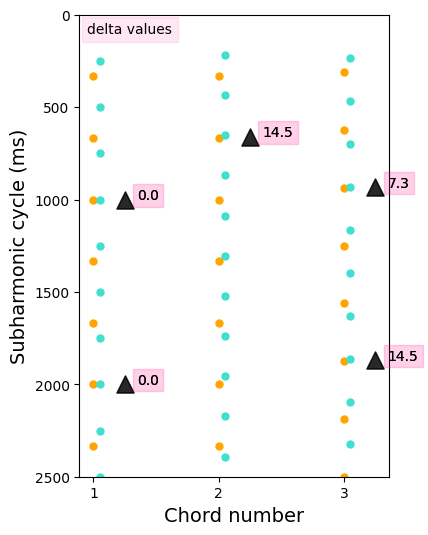

In [4]:
from biotuner.metrics import compute_subharmonic_tension, compute_subharmonics
from biotuner.biotuner_utils import frequency_to_note
from matplotlib.pyplot import figure

# define the chords
chords = [[3, 4], [3, 4.6], [3.2, 4.3]]

# define the number of subharmonics
n_harmonics = 30

# define the delta limit (ms)
delta_lim = 15

# compute subharmonic tension for all chords
subharms_tot = []
common_subs_tot = []
delta_t_tot = []
sub_tension = []
for c in chords:
    subharms, common_subs, delta_t = compute_subharmonics(c, n_harmonics, delta_lim)
    subharms_tot.append(subharms)
    common_subs_tot.append(common_subs)
    delta_t_tot.append(delta_t)
    _, _, subtens, _ = compute_subharmonic_tension(c, n_harmonics, delta_lim,
                                min_notes=2)
    sub_tension.append(subtens)
common_subs = []
for i in range(len(common_subs_tot)):
    common_subs.append([np.mean(x) for x in common_subs_tot[i]])

# print subharmonic tension values
for chord in range(len(chords)):
    print('Subharmonic tension of chord {} is {}'.format(str(chords[chord]),
                                                  str(sub_tension[chord][0])))                                                                 

# plot subharmonics and their delta values
fig, ax = plt.subplots(figsize=(4, 6))
colors = ['orange', 'turquoise', 'purple']
for i in range(len(subharms_tot)):
    m=0
    for note, color in zip(subharms_tot[i], colors):
        
        x = [i+1+m]*len(note)
        ax.scatter(x, note, color=color, s=25)
        if len(common_subs_tot[i]) > 0:
            x_fit = [i+1+0.25]*len(common_subs_tot[i])
            y_fit = [np.average(x) for x in common_subs_tot[i]]
            ax.scatter(x_fit, y_fit, color='black',
                       marker='^', s=150, alpha=0.6)
            for z, txt in enumerate(delta_t_tot[i]):
                ax.annotate(str(np.round(txt, 1)), (x_fit[z], y_fit[z]),
                            bbox=dict(boxstyle="square", alpha=0.1,color='deeppink'), 
                            xytext=(x_fit[z]+0.1, y_fit[z]))
                #ax.annotate(str(frequency_to_note(y_fit[z])), (2.5, y_fit[z]),
                #            bbox=dict(boxstyle="square", alpha=0.1,color='turquoise'), 
                #           xytext=(x_fit[z]+0.1, y_fit[z]+5))
        m = m+0.05
ax.annotate('delta values', (0.95, 100), bbox=dict(alpha=0.1, color='deeppink'))
plt.xlabel('Chord number', size=14)
plt.ylabel('Subharmonic cycle (ms)', size=14)
plt.xticks(np.arange(1, len(subharms_tot)+1, 1))
plt.ylim(0, 2500)
plt.gca().invert_yaxis()
#plt.savefig('transitional_subharmonics_5notes_IF.png', dpi=300)